In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [3]:
df =pd.read_csv('spotify.xls', index_col =0)

In [5]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [6]:
df.shape

(1000, 5000)

In [7]:
x =df.values
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [8]:
nmf = NMF(n_components = 100, max_iter = 1000, random_state =1)

In [9]:
# n_components = number of generes in the dataset

In [10]:
nmf.fit(x)

NMF(max_iter=1000, n_components=100, random_state=1)

In [11]:
user_matrix = nmf.transform(x)
song_matrix = nmf.components_.T

In [14]:
user_matrix 

array([[0.        , 0.02116834, 0.01957121, ..., 0.        , 0.36849388,
        0.46616398],
       [0.        , 0.01751705, 0.00998873, ..., 0.        , 0.32589606,
        0.32803828],
       [0.        , 0.02371388, 0.01227239, ..., 0.00280728, 0.36119387,
        0.34543601],
       ...,
       [0.        , 0.01265944, 0.01610086, ..., 0.        , 0.30992661,
        0.41364227],
       [0.02809689, 0.0276522 , 0.        , ..., 0.        , 0.16161626,
        0.55783617],
       [0.10678817, 0.01618897, 0.        , ..., 0.10684243, 0.2862127 ,
        0.44561815]])

In [15]:
# the numbers means number of times the users heard that perticuler song

In [16]:
song_matrix

array([[ 4.02749138,  1.38704466,  0.        , ...,  5.83004379,
         7.26010214,  5.17175898],
       [ 0.52623272,  0.        , 20.25570007, ...,  7.86998373,
         4.00652913,  6.95071775],
       [ 0.45417653,  8.96227707, 14.50587319, ...,  6.10929177,
         5.02293454,  6.87402994],
       ...,
       [ 3.7044027 , 18.23281526,  0.        , ...,  0.        ,
         7.79313739,  5.39638205],
       [ 3.43374043, 10.79010087,  0.        , ...,  7.33132887,
         7.01778105,  5.2940657 ],
       [ 4.18974846,  2.5620823 ,  0.        , ...,  5.60028984,
         7.01250262,  5.50965345]])

In [17]:
song_matrix.shape

(5000, 100)

In [18]:
## Steps for building recommendation system

In [22]:
def col_dist(u1,u2):
    return pow(sum(pow(u1[x] - u2[x],2)for x in range(len(u1))),0.5)

In [23]:
col_dist(user_matrix[0], user_matrix[1])

0.14968999937865946

In [28]:
def distance_from_remaining_users(buser, user_matrix):
    dist = []
    for i in range(len(user_matrix)):
        if buser != i:
            dist.append(col_dist(user_matrix[buser], user_matrix[i]))
    return dist

In [29]:
dist_user = distance_from_remaining_users(0, user_matrix)

In [30]:
dist_user

[0.14968999937865946,
 0.12486995175623222,
 0.06993695406893248,
 0.35289272962129536,
 0.4605856933056093,
 0.4723033683837537,
 0.4884707570961141,
 0.181354869774479,
 0.46571074568367815,
 0.5594680805096942,
 0.4853768307795466,
 0.3171010704121022,
 0.3993013672502242,
 0.04083409762664698,
 0.24626074779465756,
 0.3453580282793583,
 0.3268847483256988,
 0.4687681668948476,
 0.4241775690174408,
 0.14346999425694607,
 0.057778546984019886,
 0.4569352589540491,
 0.41323264953843963,
 0.38806804734738415,
 0.38844214697063467,
 0.42393495627204236,
 0.26553886426462386,
 0.06077112151842013,
 0.3936584533207645,
 0.4174582928534808,
 0.3160994280413471,
 0.2924600745213198,
 0.26144227138046405,
 0.1871006798825937,
 0.43021429509572,
 0.07836674537366776,
 0.1361701857186746,
 0.5092221543001367,
 0.3145560869137515,
 0.05833610562155095,
 0.4164322800551711,
 0.43143941806195635,
 0.4282165490830511,
 0.4215881913386211,
 0.28171348330726986,
 0.2746021962428558,
 0.0922767757646

In [32]:
len(dist_user)

999

In [33]:
nearest_users = np.argsort(dist_user)[:5]

In [36]:
for i in range(len(nearest_users)):
    nearest_users[i]+=1
nearest_users

array([244, 610, 415, 860, 214], dtype=int64)

In [37]:
for i in nearest_users:
    print('songs heard by tht users', i, 'are :')
    temp = df.iloc[i]
    print(temp[temp.values != 0].index)
    

songs heard by tht users 244 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4994',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4692)
songs heard by tht users 610 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4988', 'song_4989', 'song_4990', 'song_4991', 'song_4993',
       'song_4994', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4670)
songs heard by tht users 415 are :
Index(['song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtyp

In [41]:
def TopSongs(nearest_users, df, N):
    temp = df.iloc[nearest_users]
    dict1 = temp.max(). to_dict()
    # inside the tuple to are doing position swaping
    sorted_dict = sorted(dict1.items(), key = lambda keyvalue: (keyvalue[1], keyvalue[0]), reverse =True)[:N]
    return [x[0] for x in sorted_dict]

In [42]:
TopSongs(nearest_users, df, 15)

['song_999',
 'song_995',
 'song_993',
 'song_99',
 'song_982',
 'song_97',
 'song_961',
 'song_96',
 'song_952',
 'song_945',
 'song_942',
 'song_935',
 'song_929',
 'song_927',
 'song_926']

In [43]:
# Type 2 Recommendation system

In [45]:
WCSS = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(song_matrix)
    WCSS[k] = kmeans.inertia_

C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

In [46]:
WCSS

{1: 1670901312.545024,
 2: 1556605534.3517349,
 3: 1492755789.644442,
 4: 1443969970.7842505,
 5: 1403849626.7580311,
 6: 1371383274.898422,
 7: 1343735202.3479106,
 8: 1319170141.0663166,
 9: 1299758131.296773,
 10: 1282599491.9385865,
 11: 1272794013.4038131,
 12: 1259028004.5423844,
 13: 1252670912.8909714,
 14: 1239984690.3750627,
 15: 1232362265.6480145,
 16: 1228575732.3494282,
 17: 1222034822.0436418,
 18: 1215100306.4931746,
 19: 1210569739.8916428,
 20: 1202266005.9773936,
 21: 1201140790.8005512,
 22: 1194424567.481492,
 23: 1188827890.2505066,
 24: 1184923506.999402,
 25: 1179118351.8341787,
 26: 1175002236.484408,
 27: 1169290062.4740865,
 28: 1165311937.615817,
 29: 1163198790.8283741,
 30: 1159158963.900519,
 31: 1158126062.4028788,
 32: 1154400641.1688304,
 33: 1150362561.073411,
 34: 1146218428.429585,
 35: 1142659872.665815,
 36: 1139288413.2753172,
 37: 1139332279.7304306,
 38: 1136943394.343872,
 39: 1135286911.4172199,
 40: 1129813522.7009134,
 41: 1127607293.764828

Text(0, 0.5, 'WCSS')

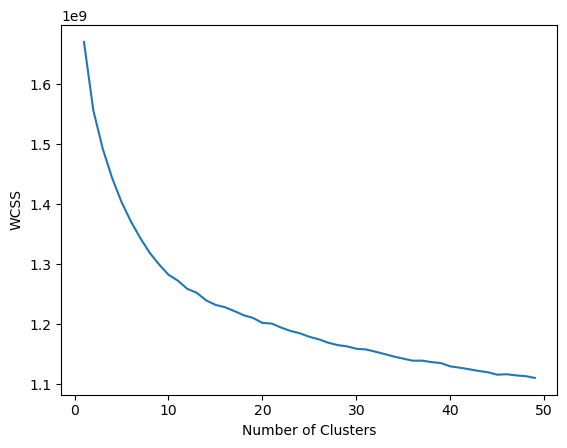

In [47]:
plt.plot(WCSS.keys(), WCSS.values())
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [55]:
def songs_in_cluster(N_clusters, df, song_matrix, n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters,max_iter =1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)

In [56]:
df.columns.to_list()

['song_1',
 'song_2',
 'song_3',
 'song_4',
 'song_5',
 'song_6',
 'song_7',
 'song_8',
 'song_9',
 'song_10',
 'song_11',
 'song_12',
 'song_13',
 'song_14',
 'song_15',
 'song_16',
 'song_17',
 'song_18',
 'song_19',
 'song_20',
 'song_21',
 'song_22',
 'song_23',
 'song_24',
 'song_25',
 'song_26',
 'song_27',
 'song_28',
 'song_29',
 'song_30',
 'song_31',
 'song_32',
 'song_33',
 'song_34',
 'song_35',
 'song_36',
 'song_37',
 'song_38',
 'song_39',
 'song_40',
 'song_41',
 'song_42',
 'song_43',
 'song_44',
 'song_45',
 'song_46',
 'song_47',
 'song_48',
 'song_49',
 'song_50',
 'song_51',
 'song_52',
 'song_53',
 'song_54',
 'song_55',
 'song_56',
 'song_57',
 'song_58',
 'song_59',
 'song_60',
 'song_61',
 'song_62',
 'song_63',
 'song_64',
 'song_65',
 'song_66',
 'song_67',
 'song_68',
 'song_69',
 'song_70',
 'song_71',
 'song_72',
 'song_73',
 'song_74',
 'song_75',
 'song_76',
 'song_77',
 'song_78',
 'song_79',
 'song_80',
 'song_81',
 'song_82',
 'song_83',
 'song_84',
 

In [57]:
df.columns.to_list().index('song_1')

0

In [52]:
df.columns.to_list().index('song_50')

49

In [58]:
def songs_in_cluster(N_clusters, df, song_matrix, n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters,max_iter =1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)

    song_vector = song_matrix[index_in_song]

In [54]:
song_matrix[0]

array([  4.02749138,   1.38704466,   0.        ,   7.56052135,
        19.86877442,   0.        ,  25.44611599,   3.43298049,
        18.14854309,  10.14661531,   0.        ,  18.11765352,
        33.34430144,  30.56918959,  40.04633672,  18.67956328,
        63.69185793,   0.        ,   3.06755163,   0.        ,
        47.40936738,  77.07003112,   5.68419549,   0.        ,
        75.98592218,   0.        ,   0.        ,   0.        ,
         0.        ,  40.34233181,   0.        ,  23.47679955,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  30.00427929,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  37.73484399, 100.20042254,
       132.62794792,   0.        ,   0.        , 147.08145032,
        23.27350978,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  94.54006207,
       165.12010864, 114.65039736, 131.87072371,  21.02

In [65]:
def songs_in_cluster(N_clusters, df, song_matrix, song_name, n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters,max_iter =1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)

    song_vector = song_matrix[index_in_song]
    all_songs_in_cluster = kmeans.predict(song_matrix)
    print(len(all_songs_in_cluster))

In [66]:
songs_in_cluster(15,df,song_matrix,'song_5',5)

C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5000


In [73]:
def songs_in_cluster(N_clusters, df, song_matrix, song_name, n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters,max_iter =1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)

    song_vector = song_matrix[index_in_song]
    all_songs_in_cluster = kmeans.predict(song_matrix)
    songs_in_selected_cluster = [x for x in range(len(all_songs_in_cluster)) 
                                 if all_songs_in_cluster[x] == kmeans.predict([song_vector])]

    song_cluster = song_matrix[songs_in_selected_cluster]
    neighbors = NearestNeighbors(n_neighbors = n_recommendations)
    neighbors.fit(song_cluster)
    recommended_songs = neighbors.kneighbors([song_matrix[index_in_song]])
    print(recommended_songs[1][0])

In [74]:
songs_in_cluster(15,df,song_matrix,'song_5',5)

C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[  0 119 215 314  76]
